In [5]:
from celebA import CelebA
from dataset import load_celeba

In [6]:
dataset = load_celeba("../CelebA")

In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tensorflow.linalg import matvec
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [8]:
from model import Generator
import tensorflow as tf
from train import sample

In [5]:
generator = Generator()
checkpoint = tf.train.Checkpoint(generator=generator)
checkpoint.restore("./checkpoints/4_11/cat_test1/ckpt-23")

In [9]:
celeba = CelebA(drop_features=[
        'Attractive',
        'Pale_Skin',
        'Blurry',
    ])

In [10]:
train_split = celeba.split('training', drop_zero=False)
valid_split = celeba.split('validation', drop_zero=False)

In [11]:
valid_split

,image_idleft,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
162770,162771.jpg,162771.jpg,0,0,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
162771,162772.jpg,162772.jpg,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,1,0
162772,162773.jpg,162773.jpg,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
162773,162774.jpg,162774.jpg,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
162774,162775.jpg,162775.jpg,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182632,182633.jpg,182633.jpg,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
182633,182634.jpg,182634.jpg,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
182634,182635.jpg,182635.jpg,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,1
182635,182636.jpg,182636.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
test, label = sample(1,100,np.array([1]))

In [27]:
result = generator.decode(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


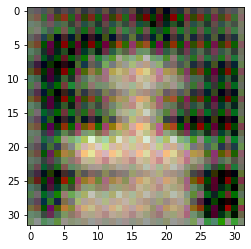

In [28]:
plt.imshow(result[0,:,:,:]*0.5+0.5)